In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
plt.rc("font", family="Malgun Gothic")

# 1. Credit Card Usage Pattern by Gender/Age
- Let's analyze card consumption patterns by gender/age group.



In [4]:
df1 = pd.read_csv('블록별 성별연령대별 카드소비패턴.csv', encoding = 'euc-kr')
df1

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50대,48288,65
1,SS048,201608,156830,M,30대,132792,10
2,SS016,202009,32925,M,50대,100600,25
3,SS001,201805,214245,F,30대,213876,40
4,SS044,201705,279472,M,30대,155930,5
...,...,...,...,...,...,...,...
495,SS012,201709,11449,F,30대,75450,45
496,SS044,201707,353037,F,30대,118708,25
497,SS054,201901,418149,F,20대,1056300,15
498,SS021,202009,269015,F,70대이상,25150,5


- change Age to int

In [5]:
def change_age(text:str):
    return text[:2]

df1['연령대별(AGE)'] = df1['연령대별(AGE)'].map(change_age).astype(int)

- To identify the amount/number of card use by (g)ender and (a)ge, a data frame called df_ga was created and grouped by gender and age group.

In [6]:
df_ga = df1[['성별(GEDNER)','연령대별(AGE)','카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)']]

df_sum = df_ga.groupby(['성별(GEDNER)','연령대별(AGE)']).sum().reset_index()
pd.options.display.float_format = '{:.0f}'.format

- It can be seen that the amount of card use is mainly male. Among them, the 20s stand out.
- It can be seen that the number of card use cases is mainly female. There are far more people in their 30s to 50s than other age groups.
- df_amt represents the total card usage amount, and df_usect represents the total number of card usage cases.

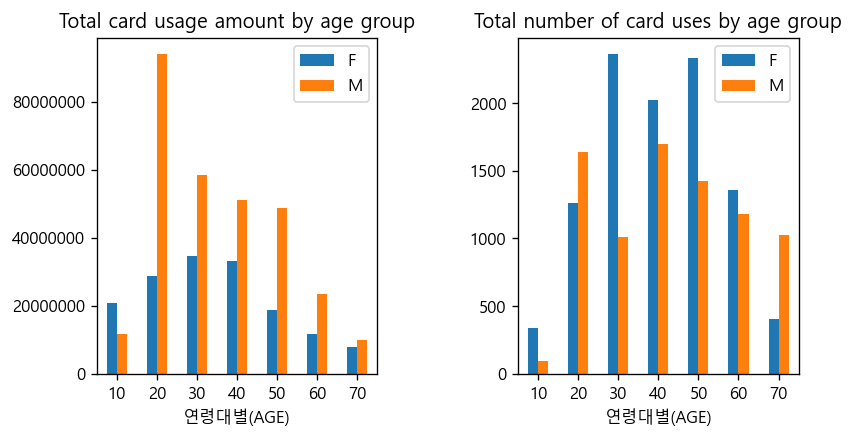

In [7]:
df_amt = pd.pivot_table(df_sum, index='연령대별(AGE)', columns='성별(GEDNER)', values='카드이용금액계(AMT_CORR)')
df_usect = pd.pivot_table(df_sum, index='연령대별(AGE)', columns='성별(GEDNER)', values='카드이용건수계(USECT_CORR)')

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[0].set_title('Total card usage amount by age group')
df_amt.plot(kind='bar',ax=axes[0])
axes[0].tick_params(axis='x', rotation=0)
axes[1].set_title('Total number of card uses by age group')
df_usect.plot(kind='bar',ax=axes[1])
axes[1].tick_params(axis='x', rotation=0)
axes[0].legend(loc='best', fontsize=10)
axes[1].legend(loc='best', fontsize=10)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.1, top=0.8, wspace=0.5, hspace=0.35)

### Let's look at the industry code data.

In [9]:
df5 = pd.read_csv('카드소비 업종코드.csv', encoding = 'euc-kr')
df5

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점
...,...,...,...,...
70,ss084,스포츠/문화/레저,스포츠/문화/레저,스키
71,ss090,교육/학원,학원,입시보습학원
72,ss091,교육/학원,학원,외국어학원
73,ss092,교육/학원,학원,예체능학원


- Looking at the 5th data, it seems that it needs to be merged with other data through the industry code.
- Change the industry code to uppercase before merging.
- We will analyze the main consumption industry by gender/age by merging with the first data.

In [10]:
df5['업종코드(UPJONG_CD)'] = df5['업종코드(UPJONG_CD)'].str.upper()
df15 = pd.merge(df1, df5, how='inner', left_on='서울시민업종코드(UPJONG_CD)', right_on='업종코드(UPJONG_CD)')

df15 = df15[['성별(GEDNER)','연령대별(AGE)','대분류(CLASS1)','중분류(CLASS2)','소분류(CLASS3)']]
df15['count'] = 1
df_15g = df15.groupby(['성별(GEDNER)','대분류(CLASS1)'])['count'].sum().reset_index()

* Looking at the graph, you can see that food/entertainment is consumed the most.
* Male consumption is higher in all sectors except for apparel/miscellaneous goods, catering/entertainment, food/grocery, and medical.

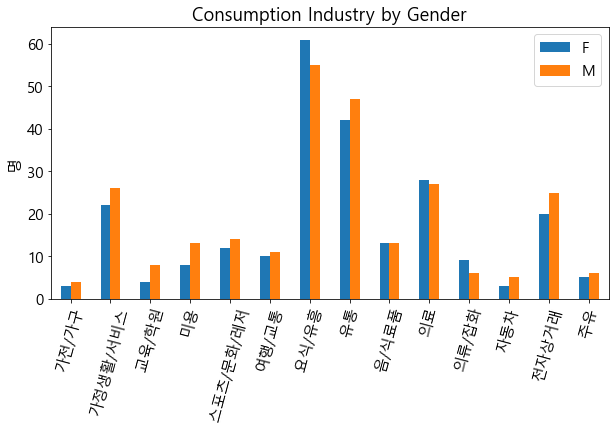

In [11]:
pd.pivot_table(df_15g, index='대분류(CLASS1)', columns='성별(GEDNER)', values='count').plot(kind='bar',figsize=(10,5))
plt.xlabel('', fontsize=15)
plt.ylabel('명', fontsize=15)
plt.xticks(fontsize= 15, rotation=75)
plt.yticks(fontsize= 15)
plt.title('Consumption Industry by Gender', fontsize=18)
plt.legend(fontsize=15)

*  Let's take a closer look at the most consumed food/entertainment.

In [14]:
df_food = df15[df15['대분류(CLASS1)'] == '요식/유흥']
df_food = df_food.groupby(['성별(GEDNER)','소분류(CLASS3)'])['count'].sum().reset_index()

* Through the small classification column of the 5th data, we were able to identify the difference in taste between men and women.

Text(0.5, 1.0, 'Food/Entertainment Consumption by Gender')

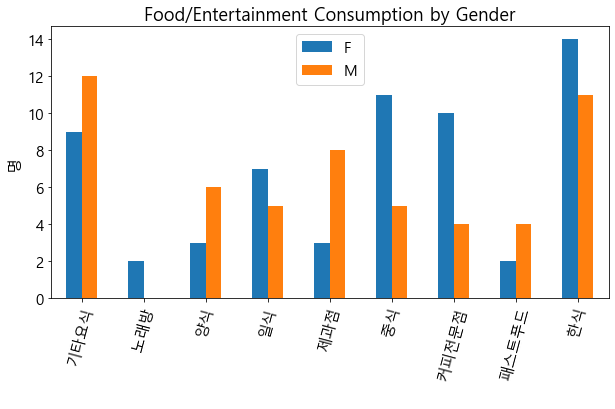

In [15]:
pd.pivot_table(df_food, index='소분류(CLASS3)', columns='성별(GEDNER)', values='count').plot(kind='bar',figsize=(10,5))
plt.xlabel(' ', fontsize=15)
plt.ylabel('명', fontsize=15)
plt.xticks(fontsize= 15, rotation=75)
plt.yticks(fontsize= 15)
plt.legend(fontsize=15)
plt.title('Food/Entertainment Consumption by Gender' ,fontsize=18)

* As a result of analyzing the main consumption industries by age group, it was found that consumption in their 30s was the largest in all industries. In addition, consumption of people in their 20s to 40s accounts for a large portion of total consumption.

Text(0.5, 1.0, '연령별 소비업종')

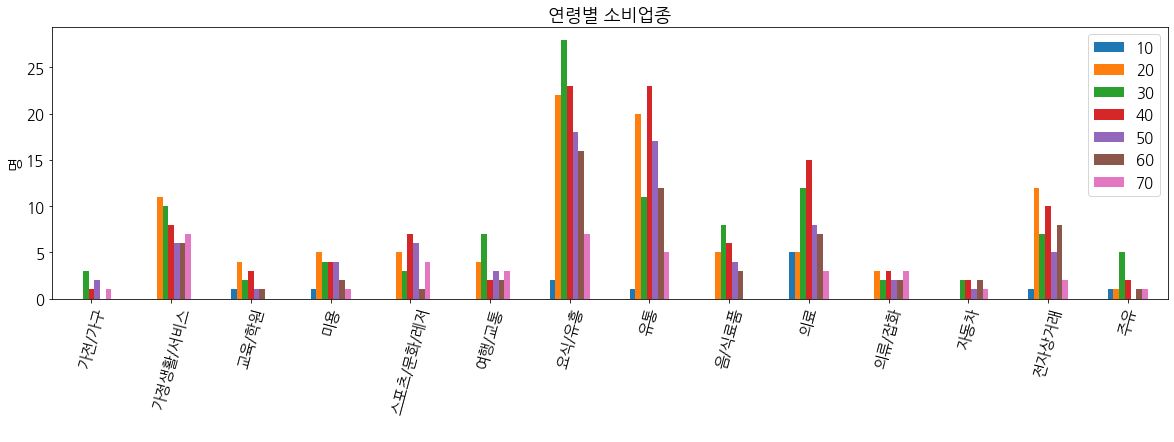

In [241]:
# 연령대별 소비업종 파악

df_age= df15.groupby(['연령대별(AGE)','대분류(CLASS1)'])['count'].sum().reset_index()
pd.pivot_table(df_age, index='대분류(CLASS1)', columns='연령대별(AGE)', values='count').plot(kind='bar',figsize=(20,5))
plt.xlabel(' ', fontsize=15)
plt.ylabel('명', fontsize=15)
plt.xticks(fontsize= 15, rotation=75)
plt.yticks(fontsize= 15)
plt.legend(fontsize=15)
plt.title('연령별 소비업종', fontsize=18)

# 2. Number of small-amount payments by time slot Card consumption pattern
- Let's analyze the card consumption pattern by time slot.

In [16]:
df2 = pd.read_csv('블록별 시간대별소액결제건수 카드소비패턴.csv', encoding = 'euc-kr')
df2

,서울시민업종코드(UPJONG_CD),기준년월(YM),시간대구간(TIME),고객주소블록코드(BLOCK_CD),카드이용금액계(AMT_CORR),소액결제건수(MICRO_PYM)
0,SS017,202006,6,11063,257,25
1,SS013,201608,6,216137,86,10
2,SS016,201802,3,224819,35,15
3,SS055,201906,2,19869,10,0
4,SS038,201612,5,28382,10,5
...,...,...,...,...,...,...
495,SS017,201911,5,366735,5,5
496,SS016,201803,2,155750,10,30
497,SS081,202103,3,366426,5,5
498,SS069,201707,3,214935,70,10


- Group the amount of card use and the number of small payments by time slot.

In [17]:
df_micro = df2[['시간대구간(TIME)','카드이용금액계(AMT_CORR)','소액결제건수(MICRO_PYM)']]
df_micro = df_micro.groupby('시간대구간(TIME)').sum().reset_index()

- You can see that the usage amount is the largest in the afternoon (4), and the number of small-amount payments is the highest in the afternoon (3).

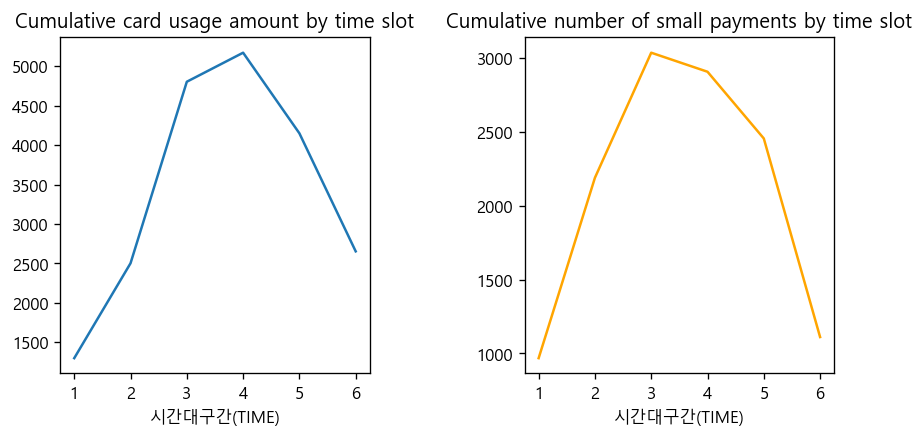

In [21]:
fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('Cumulative card usage amount by time slot')
df_micro.plot(x='시간대구간(TIME)',y='카드이용금액계(AMT_CORR)',kind='line',ax=axes[0])
axes[0].tick_params(axis='x', rotation=0)
axes[1].set_title('Cumulative number of small payments by time slot')
df_micro.plot(x='시간대구간(TIME)',y='소액결제건수(MICRO_PYM)',kind='line',ax=axes[1],color='orange')
axes[1].tick_params(axis='x', rotation=0)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.2, top=0.8, wspace=0.5, hspace=0.35)

- We will merge the 2nd and 5th data in the same way as above. Therefore, it is possible to grasp the consumption industry by hour.

In [22]:
df25 = pd.merge(df2, df5, how='inner', left_on='서울시민업종코드(UPJONG_CD)', right_on='업종코드(UPJONG_CD)')
df25 = df25[['시간대구간(TIME)','대분류(CLASS1)','중분류(CLASS2)','소분류(CLASS3)']]
df25['count'] = 1

- We will proceed by grouping them into two time zones.

In [23]:
df25['시간대']='NONE'
df25.loc[(df25['시간대구간(TIME)'] >= 1) & (df25['시간대구간(TIME)'] <= 2),'시간대']='1~2'
df25.loc[(df25['시간대구간(TIME)'] >= 3) & (df25['시간대구간(TIME)'] <=4),'시간대']='3~4'
df25.loc[(df25['시간대구간(TIME)'] >= 5) & (df25['시간대구간(TIME)'] <=6),'시간대']='5~6'

- It can be seen that the consumption of each industry increases mainly in the 3-4 time slot.

Text(0.5, 1.0, 'Consumption industry by time zone')

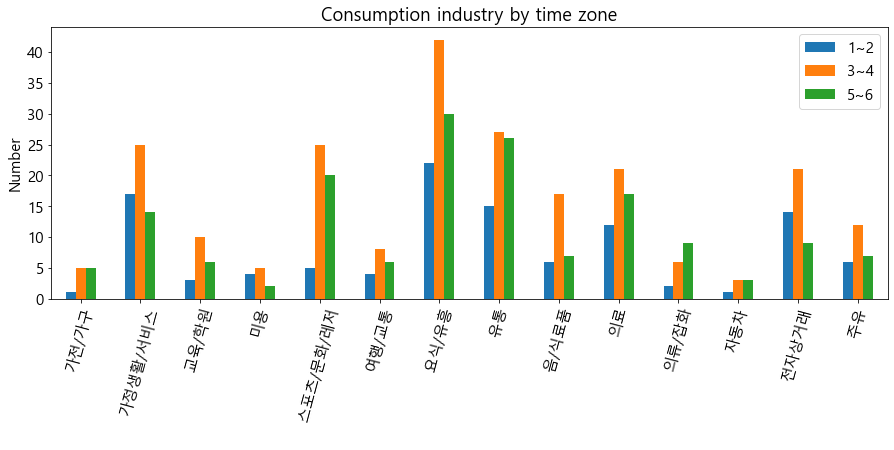

In [24]:
df_25 = df25.groupby(['시간대','대분류(CLASS1)'])['count'].sum().reset_index()
pd.pivot_table(df_25, index='대분류(CLASS1)', columns='시간대', values='count').plot(kind='bar',figsize=(15,5))
plt.xlabel(' ', fontsize=15)
plt.ylabel('Number', fontsize=15)
plt.xticks(fontsize= 15, rotation=75)
plt.yticks(fontsize= 15)
plt.legend(fontsize=15)
plt.title('Consumption industry by time zone', fontsize=18)

# 3.Card Consumption Patterns by Area
- Let's analyze the card consumption pattern for each area.

- I loaded the data and checked the city and district data. However, not all metropolitan cities included the proper city and district.

In [25]:
df3 = pd.read_csv('집계구별 일별소비지역별 카드소비패턴.csv', encoding = 'euc-kr')
print(df3['가맹점주소광역시도(SIDO)'].unique())
print(df3['가맹점주소시군구(SGG)'].unique())

['서울' '경기' '인천' '제주' '경남' '강원' '대전' '광주' '부산' '경북' '충남' '충북' '대구' '전남'
 '전북' '세종']
['강남구' '관악구' '마포구' '동작구' nan '종로구' '송파구' '용인시' '중구' '용산구' '성북구' '노원구'
 '서초구' '강서구' '중랑구' '화성시' '남양주시' '가평군' '서대문구' '광진구' '부천시' '양천구' '파주시'
 '영등포구' '수원시' '구리시' '성남시' '도봉구' '광주시' '은평구' '옹진군' '구로구' '시흥시' '동대문구' '강동구'
 '안산시' '고양시' '김포시' '평택시' '성동구' '강북구' '이천시' '연수구' '의정부시' '양주시' '남동구' '금천구'
 '부평구' '오산시' '강화군' '하남시' '광명시' '안양시' '양평군']


- Upon further confirmation, some areas of Gyeonggi-do were included in Seoul (ex: Yangpyeong-gun, Seoul). Not only Gyeonggi-do, but other regions are the same. Therefore, we will proceed with the assumption that a city/district in another region has been arbitrarily designated as a district in Seoul.

In [26]:
df_seoul = df3[(df3['가맹점주소광역시도(SIDO)'] == '서울')]
df_seoul['가맹점주소시군구(SGG)'].unique()  

array(['강남구', '관악구', '마포구', '동작구', nan, '중구', '송파구', '용산구', '성북구', '노원구',
       '서초구', '중랑구', '화성시', '용인시', '남양주시', '종로구', '가평군', '서대문구', '부천시',
       '양천구', '파주시', '영등포구', '수원시', '광주시', '은평구', '시흥시', '동대문구', '강동구',
       '안산시', '구로구', '고양시', '성남시', '김포시', '평택시', '성동구', '강북구', '이천시',
       '의정부시', '양주시', '강서구', '광진구', '금천구', '도봉구', '부평구', '안양시', '하남시',
       '양평군', '구리시'], dtype=object)

- I will leave the other regions behind and modify only the cities / districts included in Seoul.

In [27]:
df3.loc[df3['가맹점주소시군구(SGG)'] == '화성시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '용인시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '남양주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '부천시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '파주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '수원시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '광주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '시흥시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '안산시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '고양시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '성남시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '김포시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '평택시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '이천시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '의정부시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '양주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '안양시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '하남시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '구리시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '가평군', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '양평군', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '부평구', '가맹점주소광역시도(SIDO)'] = '인천'

df_seoul = df3[(df3['가맹점주소광역시도(SIDO)'] == '서울')]

- To use folium, we can map district name/code by using api. However, the given data had different name with the api, so I added the district code manually for maaping.

In [28]:
# 매핑을 위해 지역코드를 삽입
df_sido = df3.groupby('가맹점주소광역시도(SIDO)').sum().reset_index() # 가맹점주소광역시도로 group
def code(row):
    if row['가맹점주소광역시도(SIDO)'] == '강원':
        val = '32'
    if row['가맹점주소광역시도(SIDO)'] == '경기':
        val = '31'
    if row['가맹점주소광역시도(SIDO)'] == '경남':
        val = '38'
    if row['가맹점주소광역시도(SIDO)'] == '경북':
        val = '37'
    if row['가맹점주소광역시도(SIDO)'] == '광주':
        val = '24'
    if row['가맹점주소광역시도(SIDO)'] == '대구':
        val = '22'
    if row['가맹점주소광역시도(SIDO)'] == '대전':
        val = '25'
    if row['가맹점주소광역시도(SIDO)'] == '부산':
        val = '21'
    if row['가맹점주소광역시도(SIDO)'] == '서울':
        val = '11'
    if row['가맹점주소광역시도(SIDO)'] == '세종':
        val = '29'
    if row['가맹점주소광역시도(SIDO)'] == '인천':
        val = '23'
    if row['가맹점주소광역시도(SIDO)'] == '전남':
        val = '36'
    if row['가맹점주소광역시도(SIDO)'] == '전북':
        val = '35'
    if row['가맹점주소광역시도(SIDO)'] == '전남':
        val = '36'
    if row['가맹점주소광역시도(SIDO)'] == '제주':
        val = '39'
    if row['가맹점주소광역시도(SIDO)'] == '충남':
        val = '34'
    if row['가맹점주소광역시도(SIDO)'] == '충북':
        val = '33'
    return val

df_sido['시/도 코드'] = df_sido.apply(code, axis=1)

- folium 사용을 위해 광역시/도 경계선 json파일을 api로 불러오겠습니다.

출처: [https://github.com/southkorea/southkorea-maps](https://github.com/southkorea/southkorea-maps):


In [52]:
import urllib.request 
import json 
import folium
from pandas.io.json import json_normalize

url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"
response = urllib.request.urlopen(url) 
geo_str = response.read().decode("utf-8")
geo_object = json.loads(geo_str)

- I divided the data into metropolitan and non-metropolitan areas. In the given data, there was a lot of difference between Seoul/Gyeonggi/Incheon and other regions, so it was difficult to visualize the map. So, excluding the relatively populous metropolitan area, I visualized card usage patterns in non-metropolitan areas.

In [53]:
df_other = df_sido.drop(df_sido[(df_sido['가맹점주소광역시도(SIDO)'] == '경기') | (df_sido['가맹점주소광역시도(SIDO)'] == '서울') | (df_sido['가맹점주소광역시도(SIDO)'] == '인천')].index)

- This is the result of map visualization using folium. Gangwon-do had the highest cumulative card usage amount among non-metropolitan areas. (Ulsan is a non-metropolitan city, but it was not visualized because data did not exist.)

In [54]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='cartodbpositron')

map.choropleth(geo_data = geo_object,
               data = df_other,
               columns = ['시/도 코드','카드이용금액계(AMT_CORR)'],
               fill_color = 'YlOrRd',
               key_on = 'properties.code',
               highlight = True,
               legend_name = 'Cumulative card usage amount',
               )
map

- It can be seen that the cumulative number of card use is high in Jeollanam-do and Gangwon-do.

In [55]:
map1 = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='cartodbpositron')
map1.choropleth(geo_data = geo_object,
               data = df_other,
               columns = ['시/도 코드','카드이용건수계(USECT_CORR)'],
               fill_color = 'YlOrRd',
               key_on = 'properties.code',
               highlight = True,
               legend_name = 'cumulative card usage count',
               )
map1

- This time, as a result of analyzing the card usage pattern in the metropolitan area, the cumulative number of usages in Seoul was greater than the cumulative usage amount, while Gyeonggi-do and Incheon showed the opposite figure.

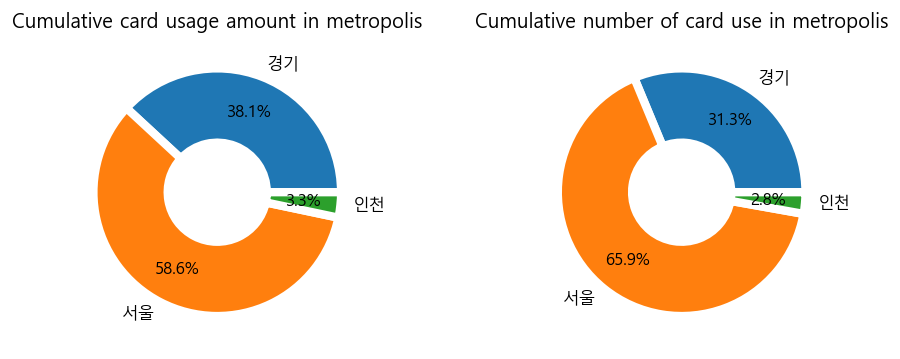

In [37]:
df_sudo = df_sido[(df_sido['가맹점주소광역시도(SIDO)'] == '서울') | (df_sido['가맹점주소광역시도(SIDO)'] == '경기')
                 | (df_sido['가맹점주소광역시도(SIDO)'] == '인천')]

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}
axes[0].pie(df_sudo['카드이용금액계(AMT_CORR)'],labels=df_sudo['가맹점주소광역시도(SIDO)']
            ,autopct='%.1f%%',wedgeprops=wedgeprops ,pctdistance=0.7)
axes[0].set_title('Cumulative card usage amount in metropolis')
axes[1].pie(df_sudo['카드이용건수계(USECT_CORR)'],labels=df_sudo['가맹점주소광역시도(SIDO)']
            ,autopct='%.1f%%',wedgeprops=wedgeprops, pctdistance=0.7)
axes[1].set_title('Cumulative number of card use in metropolis')

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.2, top=0.8, wspace=0.5, hspace=0.35) 

- This time, in order to map and visualize the data of Seoul, we will load the Seoul boundary line json file.

출처: [https://github.com/southkorea/southkorea-maps](https://github.com/southkorea/southkorea-maps)

In [38]:
# json file source: https://github.com/southkorea/southkorea-maps
import urllib.request 
import json 
import folium
from pandas.io.json import json_normalize

url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_municipalities_geo_simple.json"
response = urllib.request.urlopen(url) 
geo_str = response.read().decode("utf-8")
geo_object = json.loads(geo_str)

- As above, it is possible to use the already given region name, but there are districts whose names overlap with other regions (ex: Jung-gu, Seoul/Jung-gu, Daegu). Therefore, I added the area code one by one again.

In [39]:
df_seoul = df_seoul.groupby('가맹점주소시군구(SGG)').sum().reset_index()

def gucode(row):
    if row['가맹점주소시군구(SGG)'] == '강동구':
        val = '11250'
    if row['가맹점주소시군구(SGG)'] == '강북구':
        val = '11090'
    if row['가맹점주소시군구(SGG)'] == '종로구':
        val = '11010'
    if row['가맹점주소시군구(SGG)'] == '중구':
        val = '11020'
    if row['가맹점주소시군구(SGG)'] == '용산구':
        val = '11030'
    if row['가맹점주소시군구(SGG)'] == '성동구':
        val = '11040'
    if row['가맹점주소시군구(SGG)'] == '광진구':
        val = '11050'
    if row['가맹점주소시군구(SGG)'] == '동대문구':
        val = '11060'
    if row['가맹점주소시군구(SGG)'] == '중랑구':
        val = '11070'
    if row['가맹점주소시군구(SGG)'] == '성북구':
        val = '11080'
    if row['가맹점주소시군구(SGG)'] == '도봉구':
        val = '11100'
    if row['가맹점주소시군구(SGG)'] == '노원구':
        val = '11110'
    if row['가맹점주소시군구(SGG)'] == '은평구':
        val = '11120'
    if row['가맹점주소시군구(SGG)'] == '서대문구':
        val = '11130'
    if row['가맹점주소시군구(SGG)'] == '마포구':
        val = '11140'
    if row['가맹점주소시군구(SGG)'] == '양천구':
        val = '11150'
    if row['가맹점주소시군구(SGG)'] == '강서구':
        val = '11160'
    if row['가맹점주소시군구(SGG)'] == '구로구':
        val = '11170'
    if row['가맹점주소시군구(SGG)'] == '금천구':
        val = '11180'
    if row['가맹점주소시군구(SGG)'] == '영등포구':
        val = '11190'
    if row['가맹점주소시군구(SGG)'] == '동작구':
        val = '11200'
    if row['가맹점주소시군구(SGG)'] == '관악구':
        val = '11210'
    if row['가맹점주소시군구(SGG)'] == '서초구':
        val = '11220'
    if row['가맹점주소시군구(SGG)'] == '강남구':
        val = '11230'
    if row['가맹점주소시군구(SGG)'] == '송파구':
        val = '11240'
    return val

df_seoul['구 코드'] = df_seoul.apply(gucode, axis=1)

- Looking at the map, the amount of credit card use was as expected in Gangnam-gu, followed by Mapo-gu.

In [40]:
map2 = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='cartodbpositron')
map2.choropleth(geo_data = geo_object,
               data = df_seoul,
               columns = ['구 코드','카드이용금액계(AMT_CORR)'],
               fill_color = 'YlOrRd',
               key_on = 'properties.code',
               highlight = True,
               legend_name = 'Cumulative card usage amount',
               )
map2

C:\Users\pgon8\anaconda3\lib\site-packages\folium\folium.py:407: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


- However, the number of card uses was higher in Mapo-gu, and I think it is probably the reason for college students.

In [41]:
map2 = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='cartodbpositron')
map2.choropleth(geo_data = geo_object,
               data = df_seoul,
               columns = ['구 코드','카드이용건수계(USECT_CORR)'],
               fill_color = 'YlOrRd',
               key_on = 'properties.code',
               highlight = True,
               legend_name = 'cumulative number of card',
               )
map2

- This time, we will analyze the card usage pattern by industry in the metropolitan area and non-metropolitan area.

In [42]:
df_sudo = df3[(df3['가맹점주소광역시도(SIDO)'] == '서울') | (df3['가맹점주소광역시도(SIDO)'] == '경기') # 수도권
                  | (df3['가맹점주소광역시도(SIDO)'] == '인천')]
df_other= df3[(df3['가맹점주소광역시도(SIDO)'] != '서울') & (df3['가맹점주소광역시도(SIDO)'] != '경기') # 비수도권
                  & (df3['가맹점주소광역시도(SIDO)'] != '인천')]

df_sudo = df_sudo.groupby(['업종대분류(UPJONG_CLASS1)']).sum().reset_index()
df_other = df_other.groupby(['업종대분류(UPJONG_CLASS1)']).sum().reset_index()

- Overall, it can be seen that the amount of credit card use in the metropolitan area is larger. Of course, it is estimated to be affected by population density. In the case of non-metropolitan areas, it is estimated that sports/cultural leisure and travel/transportation consumption are higher due to resorts and industries. It can be seen that food/entertainment and distribution have the highest consumption in both the metropolitan area and non-metropolitan areas.

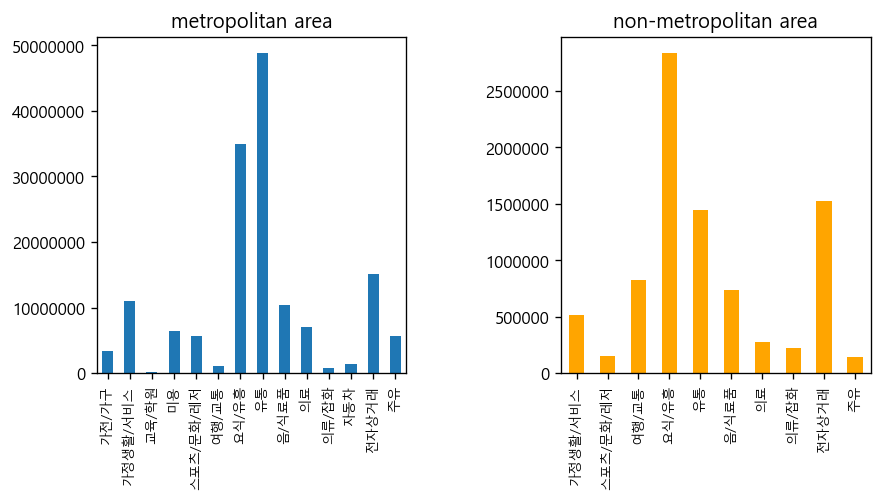

In [43]:
fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)

axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('metropolitan area')
df_sudo.plot(x='업종대분류(UPJONG_CLASS1)',y='카드이용금액계(AMT_CORR)',kind='bar',ax=axes[0],)
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('non-metropolitan area')
df_other.plot(x='업종대분류(UPJONG_CLASS1)',y='카드이용금액계(AMT_CORR)',kind='bar',ax=axes[1]
              ,color='orange')
axes[1].tick_params(axis='x', rotation=90)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)
axes[0].set_xticklabels(df_sudo['업종대분류(UPJONG_CLASS1)'], fontsize=8)
axes[1].set_xticklabels(df_other['업종대분류(UPJONG_CLASS1)'], fontsize=8)
plt.subplots_adjust(left=0.125, bottom=0.1, right=1.2, top=0.8, wspace=0.5, hspace=0.35)

- This time, overall, the number of card uses in the metropolitan area is higher. In the case of the metropolitan area, distribution has the highest number of card uses, followed by restaurants/entertainment and e-commerce. In the case of non-metropolitan areas, the number of uses for food/entertainment is the highest, followed by home life/service. 

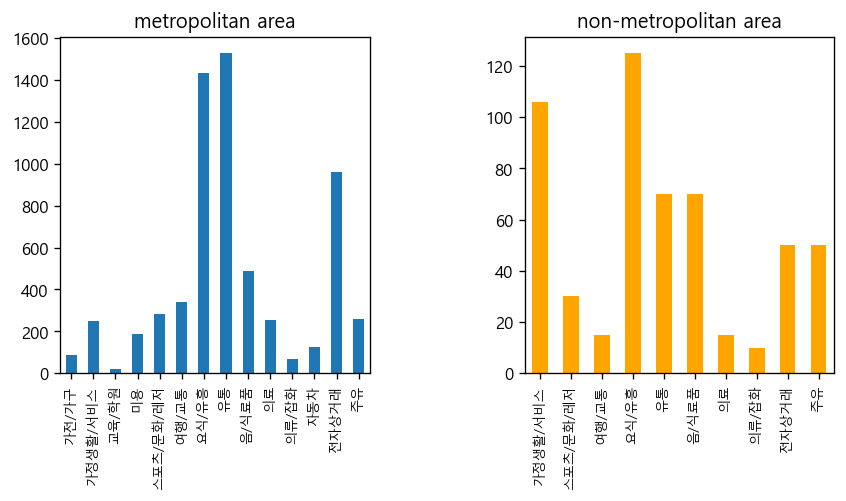

In [44]:
fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)

axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('metropolitan area')
df_sudo.plot(x='업종대분류(UPJONG_CLASS1)',y='카드이용건수계(USECT_CORR)',kind='bar',ax=axes[0],)
axes[0].tick_params(axis='x', rotation=90)
axes[1].set_title('non-metropolitan area')
df_other.plot(x='업종대분류(UPJONG_CLASS1)',y='카드이용건수계(USECT_CORR)',kind='bar',ax=axes[1] ,color='orange')
axes[1].tick_params(axis='x', rotation=90)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)
axes[0].set_xticklabels(df_sudo['업종대분류(UPJONG_CLASS1)'], fontsize=8)
axes[1].set_xticklabels(df_other['업종대분류(UPJONG_CLASS1)'], fontsize=8)
plt.subplots_adjust(left=0.125,bottom=0.1, right=1.2, top=0.8, wspace=0.5, hspace=0.35)

# 4) Card consumption patterns by year
- Finally, we will analyze the card consumption patterns by year.
- I will change the base date (YMD)' column to datetime64.

In [48]:
df4 = pd.read_csv("집계구별 일별시간대별 카드소비패턴.csv", encoding = 'euc-kr')
df4

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,요식/유흥,20161004,6,1123076010009,104624,10
1,유통,20210303,5,1122060030003,382592,20
2,유통,20170606,6,1123066022301,341688,5
3,스포츠/문화/레저,20171206,5,1124075020103,925118,5
4,의료,20160909,6,1113075030002,217985,50
...,...,...,...,...,...,...
495,전자상거래,20170727,2,1120069010006,90540,25
496,유통,20190406,3,1123072010303,1211325,20
497,교육/학원,20210107,3,1119072030101,266590,15
498,전자상거래,20200426,4,1105063030203,547264,25


In [49]:
df4['기준일자(YMD)'] = pd.to_datetime(df4['기준일자(YMD)'], format='%Y%m%d')

df_temp = df4[['기준일자(YMD)','카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)']]
df_time = df_temp.copy() 
df_time['년도'] = df4['기준일자(YMD)'].dt.year
df_time['월'] = df4['기준일자(YMD)'].dt.month

- Most recent/last data is as of 31 Jul 2021.

In [50]:
df_time.sort_values(['기준일자(YMD)'],ascending=False).head(2)

,기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),년도,월
407,2021-07-31,1190048,5,2021,7
49,2021-07-31,629188,35,2021,7


C:\Users\pgon8\AppData\Local\Temp\ipykernel_9108\2838054129.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df_year['년도'], fontsize=8)
C:\Users\pgon8\AppData\Local\Temp\ipykernel_9108\2838054129.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df_year['년도'], fontsize=8)


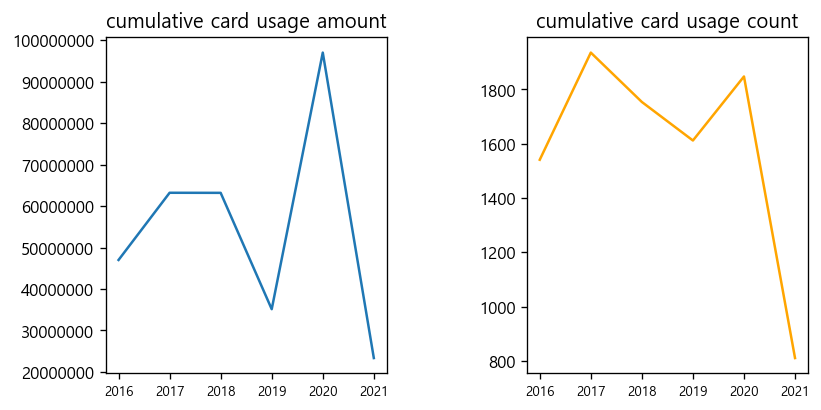

In [58]:
# 년도별 누적 카드이용금액/건수
df_year = df_time.groupby('년도').sum().reset_index()

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('cumulative card usage amount')
df_year.plot(x='년도',y='카드이용금액계(AMT_CORR)',kind='line',ylabel='누적 카드이용금액계명',ax=axes[0])
axes[0].tick_params(axis='x', rotation=0)
axes[1].set_title('cumulative card usage count')
df_year.plot(x='년도',y='카드이용건수계(USECT_CORR)',kind='line',ylabel='누적 카드이용금액계명',ax=axes[1],color='orange')
axes[1].tick_params(axis='x', rotation=0)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].set_xticklabels(df_year['년도'], fontsize=8)
axes[1].set_xticklabels(df_year['년도'], fontsize=8)
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)
axes[0].set_xticks(df_year['년도'])
axes[1].set_xticks(df_year['년도'])

plt.subplots_adjust(left=0.125,bottom=0.1, right=1.1, top=0.8, wspace=0.5, hspace=0.35)

- This is the most recent 2021 monthly card usage amount / number of cases.

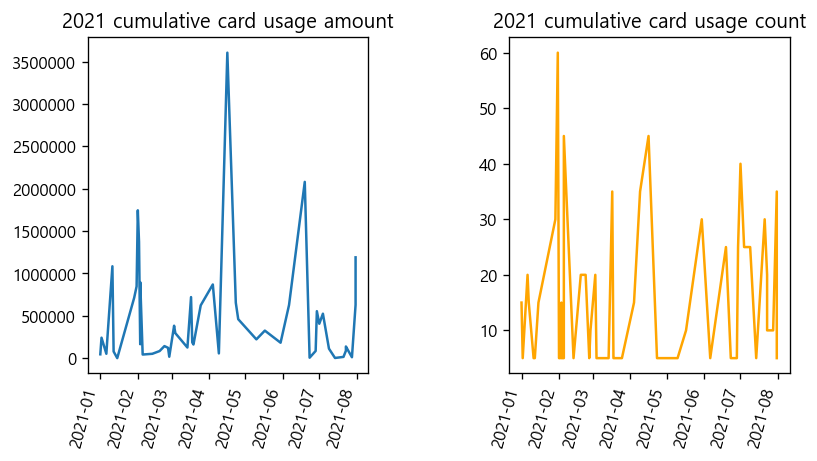

In [57]:
df_2021 = df_time[(df_time['년도'] == 2021)]

fig, axes = plt.subplots(1, 2)
fig.set_dpi(120)
axes[0].ticklabel_format(style='plain')
axes[1].ticklabel_format(style='plain')
axes[0].set_title('2021 cumulative card usage amount')
df_2021.plot(x='기준일자(YMD)',y='카드이용금액계(AMT_CORR)',kind='line',ax=axes[0])
axes[0].tick_params(axis='x', rotation=75)
axes[1].set_title('2021 cumulative card usage count')
df_2021.plot(x='기준일자(YMD)',y='카드이용건수계(USECT_CORR)',kind='line',ax=axes[1],color='orange')
axes[1].tick_params(axis='x', rotation=75)
axes[0].get_legend().remove()
axes[1].get_legend().remove()
axes[0].xaxis.label.set_visible(False)
axes[1].xaxis.label.set_visible(False)
axes[0].yaxis.label.set_visible(False)
axes[1].yaxis.label.set_visible(False)

plt.subplots_adjust(left=0.125, bottom=0.1, right=1.1, top=0.8, wspace=0.5, hspace=0.35)